In [1]:
!pip install seaborn
!pip install sklearn

     |████████████████████████████████| 292 kB 5.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 49.7 MB/s            
     |████████████████████████████████| 306 kB 23.7 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [2]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

In [3]:
def load_dataset(data):
    df = pd.read_csv(data)
    return df

In [4]:
data = 'iris.csv'
dt = load_dataset(data)
dt

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
def summarize_dataset(dt):
    shapes = dt.shape
    first_lines = dt.head(10)
    statitsdic_df = dt.describe()
    # gb = dt.groupby('class').size()
    print(f"This shape: {shapes}\n\nThese are the first 10 lines: \n\n{first_lines}\n\nThis is the statistical summary:\n\n{statitsdic_df}")


In [6]:
summarize_dataset(dt)

This shape: (150, 5)

These are the first 10 lines: 

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

This is the statistical summary:

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000

In [7]:
def print_plot_univariate(dt):
    sns.pairplot(dt, hue='class')  
    plt.figure(figsize=(10,10))
    dt.hist(color='g')
    plt.show()

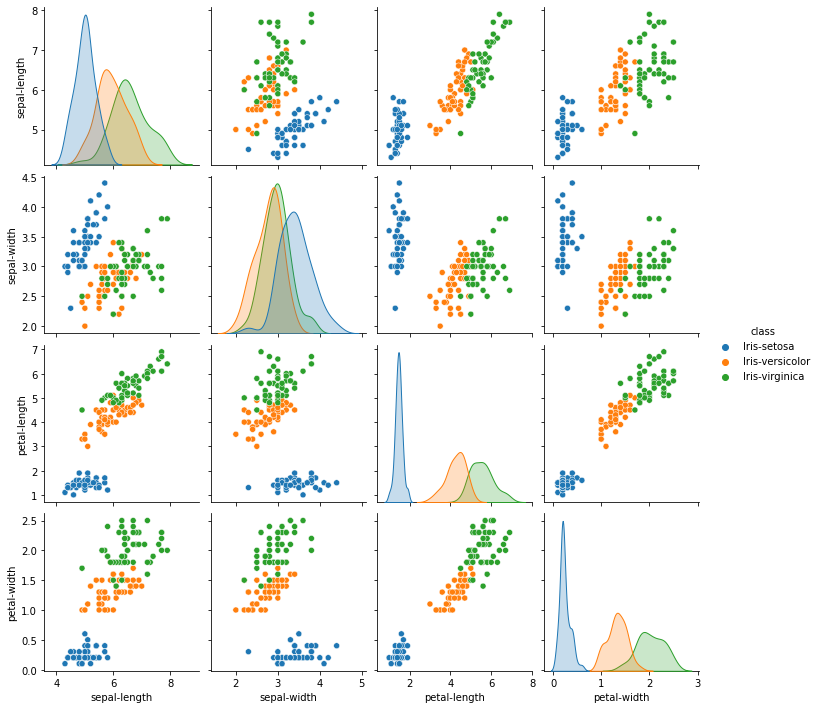

<Figure size 720x720 with 0 Axes>

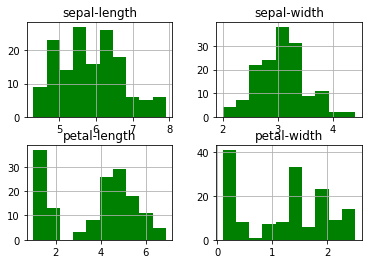

In [9]:
print_plot_univariate(dt)

In [10]:
def print_plot_multivariate(file_data):    
    plt.figure(figsize=(10,10))
    scatter_matrix(file_data, color='r')
    plt.show()

<Figure size 720x720 with 0 Axes>

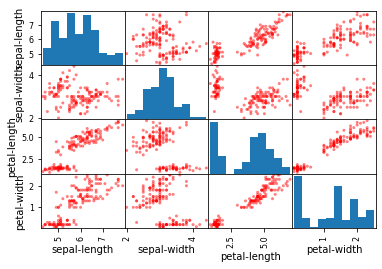

In [11]:
print_plot_multivariate(dt)

In [14]:
def my_print_and_test_models(dt):
    m1 = DecisionTreeClassifier()
    m2 = GaussianNB()
    m3 = KNeighborsClassifier()
    m4 = LogisticRegression(solver='liblinear', multi_class='ovr')
    m5 = LinearDiscriminantAnalysis()
    m6 = SVC(gamma='auto')

    array = dt.values
    X = array[:,0:4]
    y = array[:,4]
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.20, random_state=1)

    mr1 = cross_val_score(m1, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    mr2 = cross_val_score(m2, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    mr3 = cross_val_score(m3, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    mr4 = cross_val_score(m4, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    mr5 = cross_val_score(m5, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    mr6 = cross_val_score(m6, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    dr , gb, kb, lr, ld, sm = 'DecisionTree', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'LinearDiscriminant', 'SVM'

    print(f"{dr}: {mr1.mean()}, ({mr1.std()})\n\n",f"{gb}: {mr2.mean()}, ({mr2.std()})\n\n",f"{kb}: {mr3.mean()}, ({mr3.std()})\n\n",f"{lr}: {mr4.mean()}, ({mr4.std()})\n\n",f"{ld}: {mr5.mean()}, ({mr5.std()})\n\n",f"{sm}: {mr6.mean()}, ({mr6.std()})")
      

In [15]:
my_print_and_test_models(dt)

DecisionTree: 0.9083333333333333, (0.008333333333333304)

 GaussianNB: 0.95, (0.016666666666666663)

 KNeighbors: 0.9416666666666667, (0.025000000000000022)

 LogisticRegression: 0.8916666666666666, (0.041666666666666685)

 LinearDiscriminant: 0.975, (0.008333333333333304)

 SVM: 0.9666666666666666, (0.016666666666666663)
